In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
file1=pd.read_csv(r"C:\Users\sayud\OneDrive\Desktop\Prodigy\gender_submission.csv")
file2=pd.read_csv(r"C:\Users\sayud\OneDrive\Desktop\Prodigy\test.csv")
# Merge the two dataframes based on the common 'ID' column
merged_data = pd.merge(file1, file2, on='PassengerId', how='inner')  # you can change 'inner' to 'left', 'right', or 'outer' depending on the type of join you need

# Save the merged data to a new Excel file
merged_data.to_excel('merged_output.xlsx', index=False)

print("Files merged successfully!")


Files merged successfully!


In [9]:
merged_file=pd.read_excel(r"C:\Users\sayud\OneDrive\Desktop\Prodigy\merged_output.xlsx")
merged_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
# Fill missing Age values with the median age
merged_data['Age'].fillna(merged_data['Age'].median(),inplace=True)

C:\Users\sayud\AppData\Local\Temp\ipykernel_4132\797670233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Age'].fillna(merged_data['Age'].median(),inplace=True)


In [16]:
# Group ages into bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
merged_data['AgeGroup'] = pd.cut(merged_data['Age'], bins=age_bins, labels=age_labels, right=False)

In [19]:
# Convert 'Survived' to categorical for better visualization
merged_data['Survived'] = merged_data['Survived'].map({0: 'Not Survived', 1: 'Survived'})

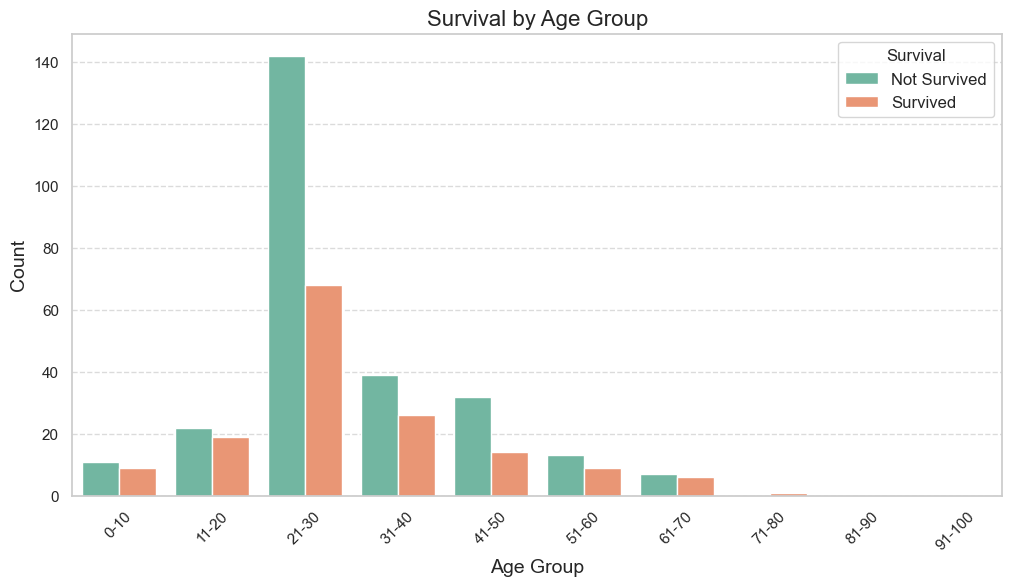

In [22]:
# Plot: Survival by Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='AgeGroup', hue='Survived', palette='Set2', dodge=True)
plt.title('Survival by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survival', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()